<p style="font-size:15pt; text-align:center">
    Introduction to Data Science
</p>
<p style="font-size:20pt; text-align:center">
    Data relationships
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import scipy.stats as stats

# Loading dataset with mixed variable types

The data set contains demographic information about individuals, where they live (region), whether they smoke, and how much they pay for health insurance (charges).

We read the data using pandas.

In [2]:
datamixed = pd.read_csv("./files/insurance.csv")
print(datamixed.shape)
datamixed.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

## overall statistics

In [3]:
# data types
datamixed.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
# Are there missing values
datamixed.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# statistics for numerical values
datamixed.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## single variable analysis

<AxesSubplot:>

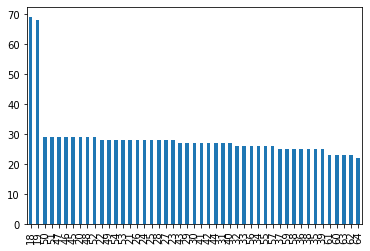

In [10]:
# age
datamixed.age.value_counts().plot(kind="bar")

(array([ 20.,  44.,  93., 154., 191., 208., 192., 160., 131.,  74.,  39.,
         15.,  13.,   2.,   2.]),
 array([15.96 , 18.438, 20.916, 23.394, 25.872, 28.35 , 30.828, 33.306,
        35.784, 38.262, 40.74 , 43.218, 45.696, 48.174, 50.652, 53.13 ]),
 <BarContainer object of 15 artists>)

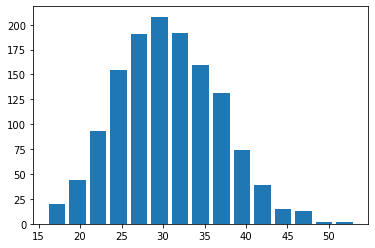

In [11]:
# Distribution of bmi
plt.hist(datamixed.loc[:,"bmi"], bins=15, rwidth=0.8)

<AxesSubplot:ylabel='Frequency'>

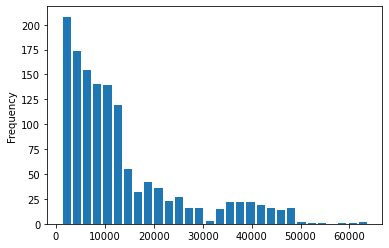

In [12]:
# Distribution of charges
datamixed.charges.plot(kind="hist", rwidth=0.8, bins=30)

## Relating categorical and quantitative data

In [6]:
masksmoker = (datamixed['smoker'] == 'yes')  # Easy indexing: The power of numpy
masksmoker

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

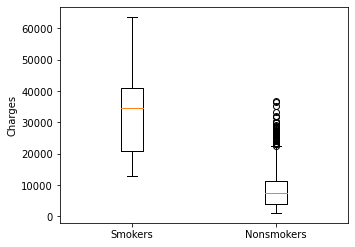

In [7]:
# box plots 
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot([datamixed['charges'][masksmoker], datamixed['charges'][~masksmoker]]);

axes.set_ylabel('Charges')
axes.set_xticklabels(['Smokers', 'Nonsmokers']);

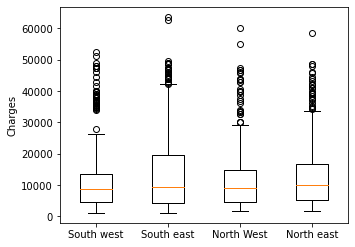

In [15]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot([datamixed['charges'][datamixed['region'] == 'southwest'],
              datamixed['charges'][datamixed['region'] == 'southeast'], 
              datamixed['charges'][datamixed['region'] == 'northwest'], 
              datamixed['charges'][datamixed['region'] == 'northeast']]);

axes.set_ylabel('Charges')
axes.set_xticklabels(['South west', 'South east', 'North West', 'North east']);

## Correlations

In [16]:
corr = datamixed.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Encoding category

We can see that categorical names can not be used to calculate the correlation, we need to transform them to numerical!

In [17]:
# at first, you need to check how many categories in the dataset.
datamixed.loc[:,"sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
datamixed.loc[:,"sex_01"] = datamixed.loc[:,"sex"].map({"male":0, "female":1})
datamixed.head()

,age,sex,bmi,children,smoker,region,charges,sex_01
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


you can do the same way for other categorical variables.

In [19]:
datamixed.loc[:,"smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
datamixed.loc[:,"smoker_01"] = datamixed.loc[:,"smoker"].map({"no":0, "yes":1})
datamixed.head()

,age,sex,bmi,children,smoker,region,charges,sex_01,smoker_01
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


In [21]:
datamixed.loc[:,"region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [22]:
datamixed.loc[:,"region_1234"] = datamixed.loc[:,"region"].map({
    "southeast":1,
    "southwest":2,
    "northwest":3,
    "northeast":4
})
datamixed.head(5)

,age,sex,bmi,children,smoker,region,charges,sex_01,smoker_01,region_1234
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,2
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,3
4,32,male,28.880,0,no,northwest,3866.85520,0,0,3


### corr

In [26]:
datamixed.head()

,age,sex,bmi,children,smoker,region,charges,sex_01,smoker_01,region_1234
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,2
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,3
4,32,male,28.880,0,no,northwest,3866.85520,0,0,3


In [27]:
corr = datamixed.corr()
corr

,age,bmi,children,charges,sex_01,smoker_01,region_1234
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019,0.006308
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750,-0.262754
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673,0.001205
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251,-0.039473
sex_01,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185,0.012816
smoker_01,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000,-0.038873
region_1234,0.006308,-0.262754,0.001205,-0.039473,0.012816,-0.038873,1.000000


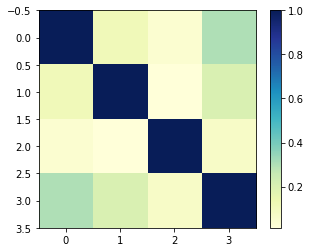

In [25]:
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
img = ax.imshow(corr, cmap="YlGnBu")
fig.colorbar(img)

In [8]:
# check the correlation between gender and age:
datamixed.groupby("age").charges.mean()

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

## plot correlations

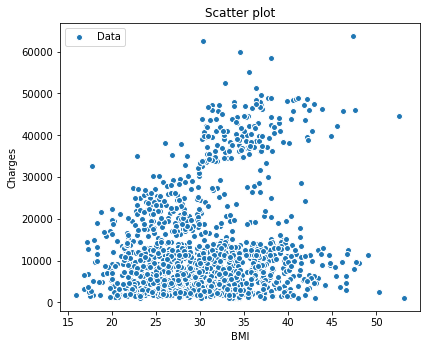

In [14]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'], datamixed['charges'], label='Data', edgecolors='w');

axes.legend(loc='upper left'); # 设置图例位置
axes.set_xlabel('BMI'); 
axes.set_ylabel('Charges'); 
axes.set_title('Scatter plot');

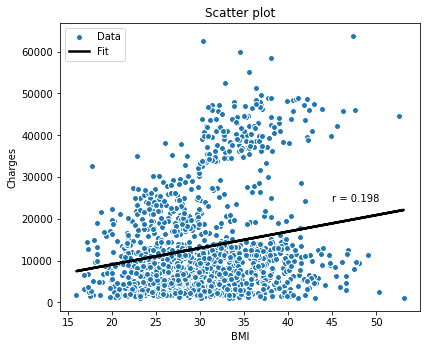

In [28]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'], datamixed['charges'], label='Data', edgecolors='w');

# Plot fit
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'], datamixed['charges'])
line = slope * datamixed['bmi'] + intercept
axes.plot(datamixed['bmi'], line, linewidth=2.5, color='k', label='Fit')

axes.text(45, 24000, "r = " + str(round(r_value, 3)))
axes.legend(loc='upper left'); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

The data points relate in a very weird way. Some stay on the bottom, some go up, and there is some "bottleneck" at BMI=30. Sure, we can fit a linear trend, but is it meaningful? We have to be careful.

### correlations by categorical variables

Maybe adding information from a categorical variable clears things up:

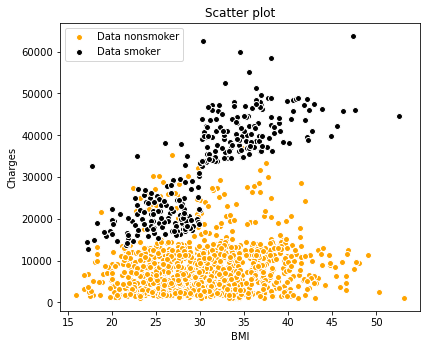

In [29]:
masksmoker = (datamixed['smoker'] == 'yes')  # Easy indexing: The power of numpy

fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

Aha! We have two sub-groups with different relations: Smokers and non-smokers are treated differently for insurance purposes. Next, let us do the linear regression on each of the sub-groups:

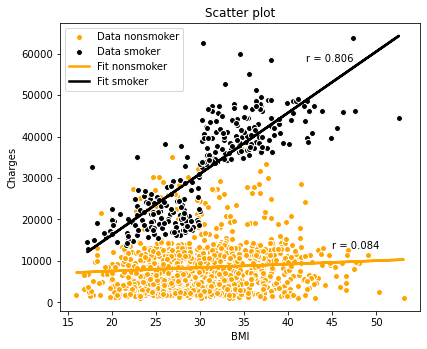

In [30]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

# Plot fits
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker])
axes.plot(datamixed['bmi'][~masksmoker], slope * datamixed['bmi'][~masksmoker] + intercept, linewidth=2.5, color='orange', label='Fit nonsmoker')
axes.text(45, 13000, "r = " + str(round(r_value, 3)))
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker])
axes.plot(datamixed['bmi'][masksmoker], slope * datamixed['bmi'][masksmoker] + intercept, linewidth=2.5, color='k', label='Fit smoker')
axes.text(42, 58000, "r = " + str(round(r_value, 3)))

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

Our conclusion, if we stop here:
* **For non-smokers**: There is a very weak linear relation between BMI and charges. Apparently the insurance does not care too much about your BMI if you do not smoke
* **For smokers**: There seem to be 2 sub-groups of smokers treated differently by the insurance: Those with BMI below 30 and those with BMI above 30. The linear regression through both these groups shows that High-BMI smokers pay higher charges. This should not be the end of the analysis, however: Since we have two sub-groups, we have to question whether a linear regression through them is justified.

# The end